In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns

2023-09-04 17:36:33.000296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 17:36:34.099221: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
from carPricePrediction.constants import *
from carPricePrediction.utils.common import read_yaml

In [8]:
import os
os.chdir("../")

In [9]:
%pwd

'/mnt/e/car_price_prediction'

In [10]:
config = read_yaml(CONFIG_FILE_PATH)

[2023-09-04 17:39:34,112: INFO: common: f ===============>>> Yaml file: {path_to_yaml} loaded Successfully.]


In [14]:
print(config.data_ingestion.data_file)
data_file = config.data_ingestion.data_file

artifacts/data_ingestion/second-hand-used-cars-data-set-linear-regression/train.csv


In [15]:
df = pd.read_csv(data_file)
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [16]:
df.shape

(1000, 12)

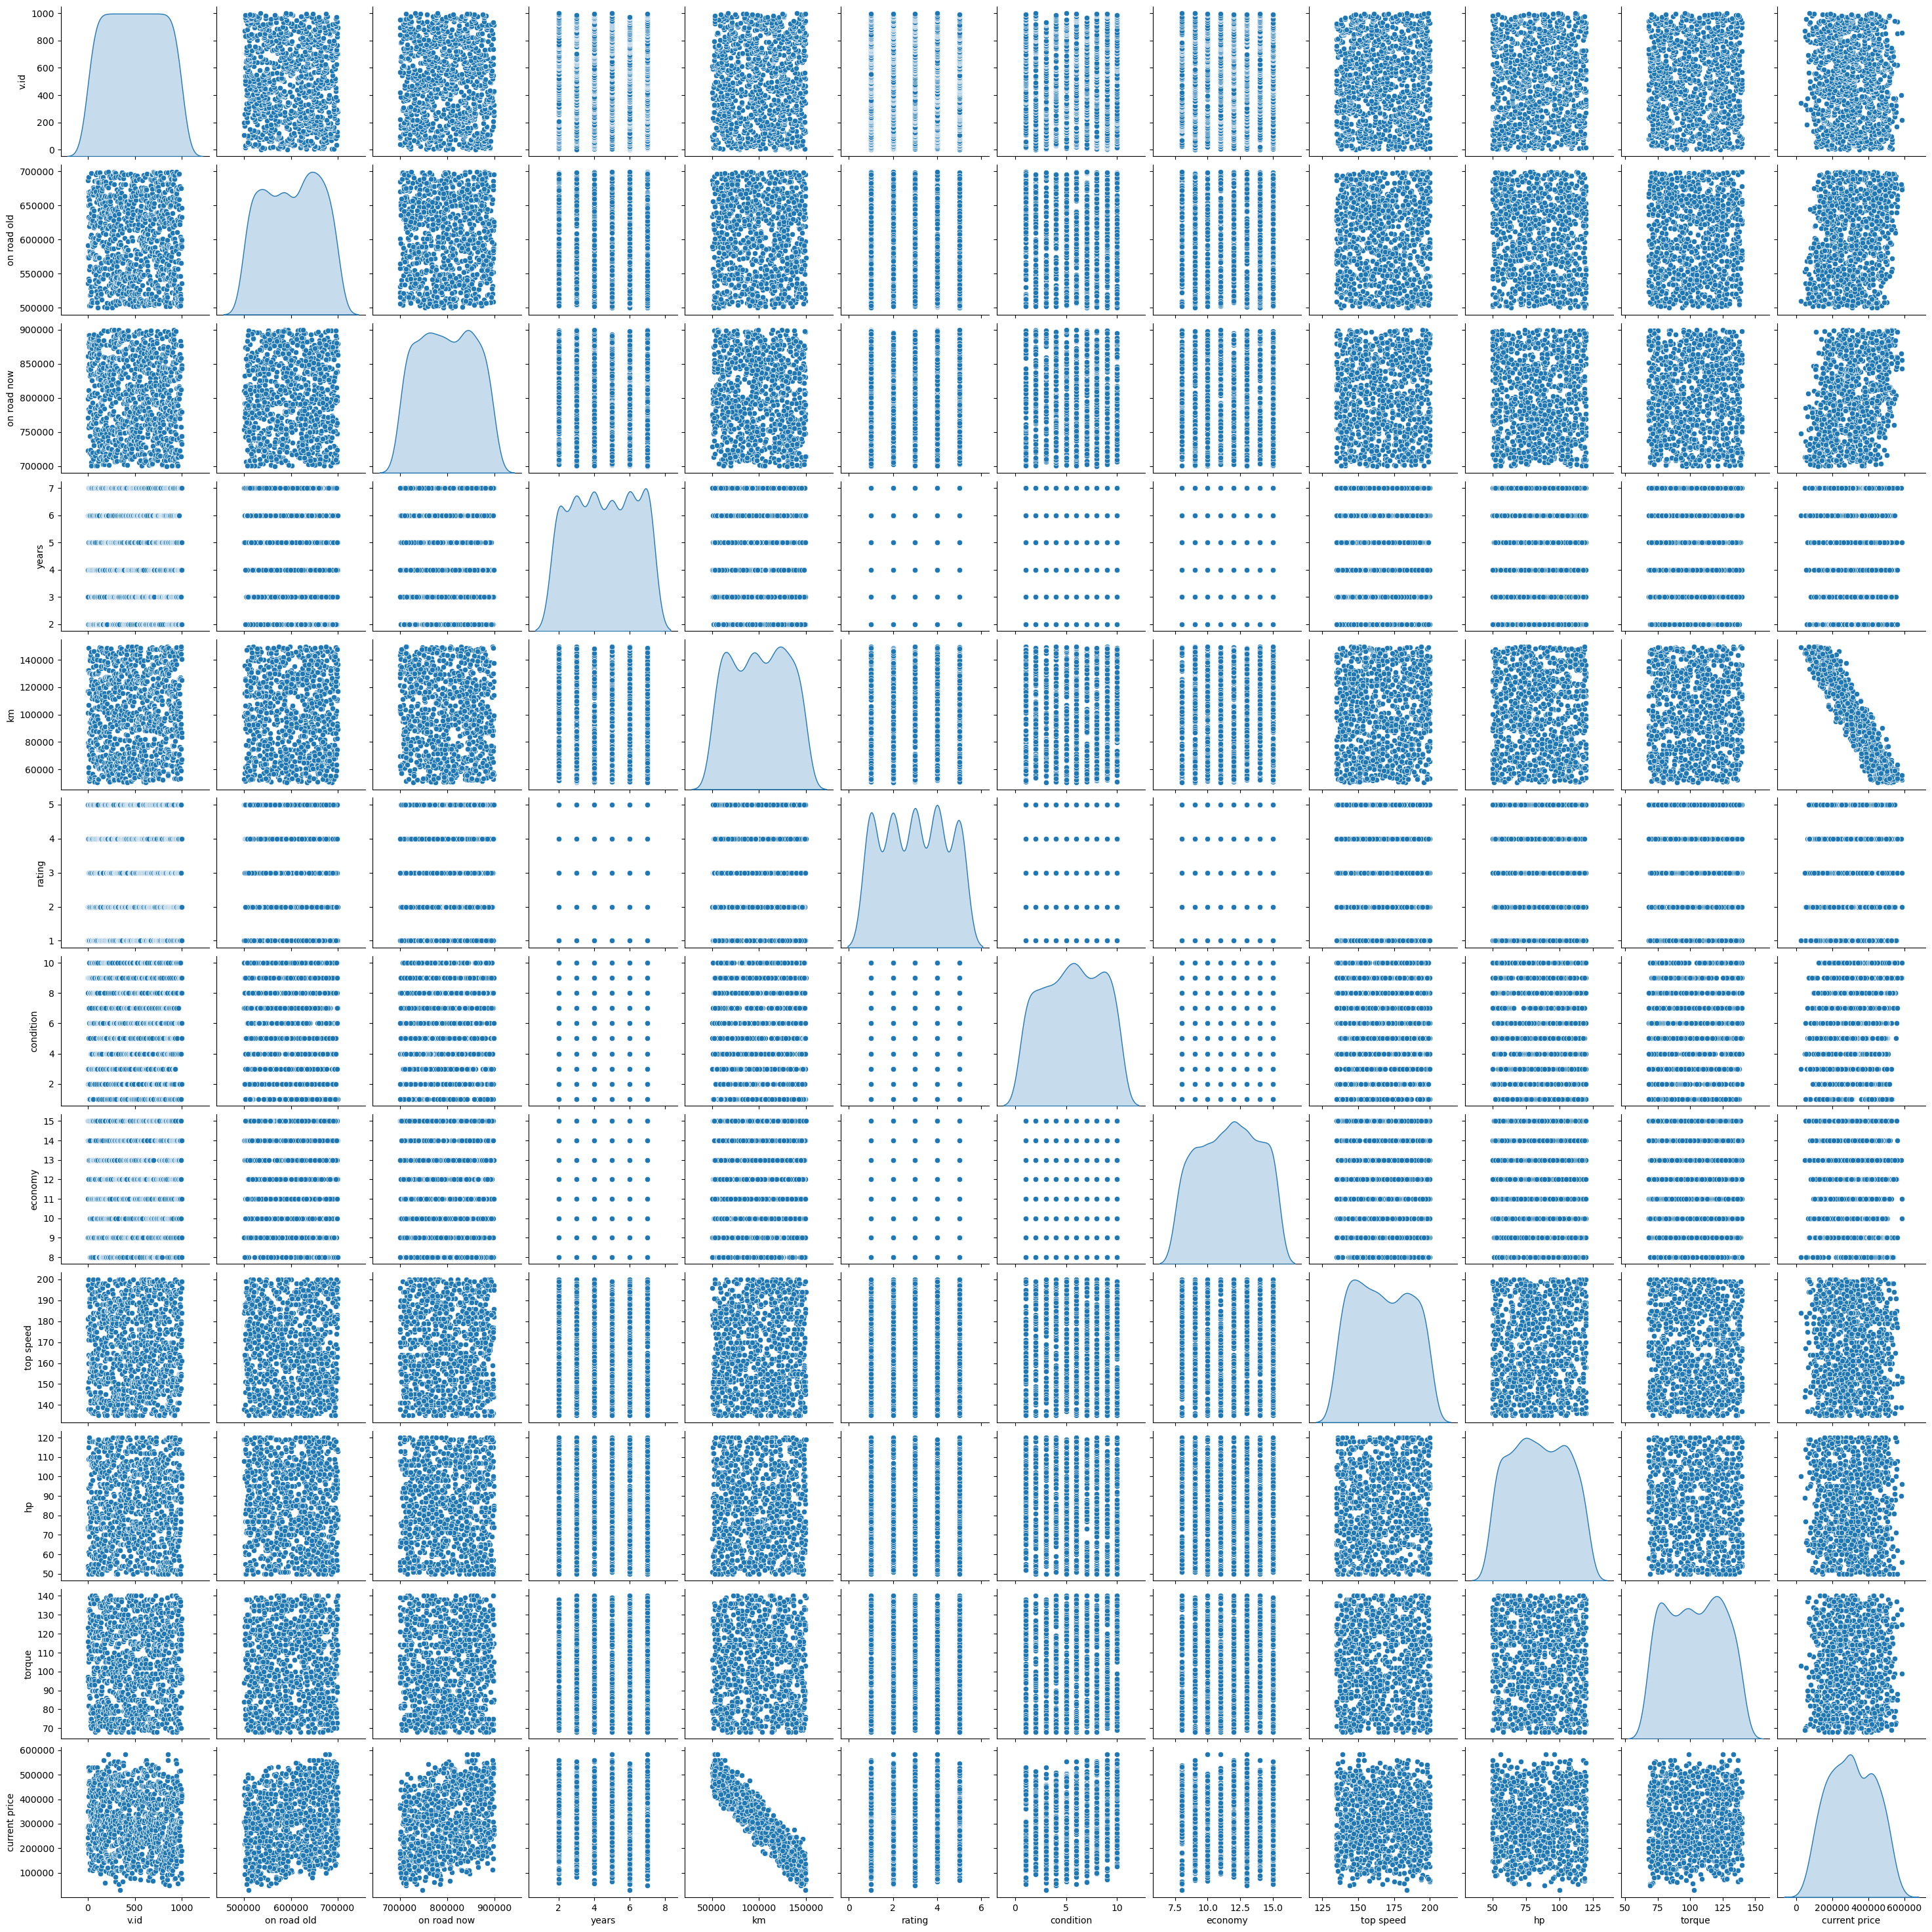

In [18]:
sns.pairplot(df[['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [22]:
tensor_data = tf.constant(df)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [24]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[5])

tf.Tensor(
[9.250000e+02 6.014390e+05 7.492640e+05 5.000000e+00 5.317400e+04
 2.000000e+00 4.000000e+00 1.300000e+01 1.380000e+02 1.170000e+02
 1.350000e+02 4.619005e+05], shape=(12,), dtype=float32)


In [25]:
print(tensor_data[:5])

tf.Tensor(
[[9.170000e+02 5.550550e+05 8.856850e+05 4.000000e+00 1.062090e+05
  3.000000e+00 1.000000e+00 1.200000e+01 1.840000e+02 8.900000e+01
  1.080000e+02 2.954065e+05]
 [8.560000e+02 5.631320e+05 8.055850e+05 2.000000e+00 1.489570e+05
  3.000000e+00 9.000000e+00 8.000000e+00 1.390000e+02 8.800000e+01
  8.500000e+01 1.183485e+05]
 [9.420000e+02 6.749400e+05 7.901180e+05 6.000000e+00 1.492850e+05
  5.000000e+00 6.000000e+00 1.100000e+01 1.470000e+02 9.300000e+01
  7.500000e+01 1.371695e+05]
 [5.860000e+02 5.891650e+05 8.071500e+05 6.000000e+00 5.307500e+04
  5.000000e+00 7.000000e+00 9.000000e+00 2.000000e+02 7.300000e+01
  1.170000e+02 4.921710e+05]
 [5.580000e+02 6.029440e+05 7.342070e+05 7.000000e+00 1.172400e+05
  4.000000e+00 9.000000e+00 1.500000e+01 1.480000e+02 7.300000e+01
  7.700000e+01 2.215100e+05]], shape=(5, 12), dtype=float32)


In [26]:
X = tensor_data[:, 3:-1]
print(X.shape)

(1000, 8)


In [27]:
print(X[:5])

tf.Tensor(
[[4.00000e+00 1.06209e+05 3.00000e+00 1.00000e+00 1.20000e+01 1.84000e+02
  8.90000e+01 1.08000e+02]
 [2.00000e+00 1.48957e+05 3.00000e+00 9.00000e+00 8.00000e+00 1.39000e+02
  8.80000e+01 8.50000e+01]
 [6.00000e+00 1.49285e+05 5.00000e+00 6.00000e+00 1.10000e+01 1.47000e+02
  9.30000e+01 7.50000e+01]
 [6.00000e+00 5.30750e+04 5.00000e+00 7.00000e+00 9.00000e+00 2.00000e+02
  7.30000e+01 1.17000e+02]
 [7.00000e+00 1.17240e+05 4.00000e+00 9.00000e+00 1.50000e+01 1.48000e+02
  7.30000e+01 7.70000e+01]], shape=(5, 8), dtype=float32)


In [28]:
y = tensor_data[:, -1]

print(y[:5])

tf.Tensor([295406.5 118348.5 137169.5 492171.  221510. ], shape=(5,), dtype=float32)


In [29]:
print(y.shape)

(1000,)


In [30]:
y = tf.expand_dims(y, axis=-1)
print(y.shape)

(1000, 1)


In [34]:
from tensorflow.keras.layers import Normalization

In [35]:
normalizer = Normalization(mean = 5, variance = 4)
x_normalized = tf.constant([[3,4,5,6,7],
                           [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>